In [1]:
import pandas as pd

In [2]:
df = pd.read_excel('C:/Users/Danie/Downloads/default of credit card clients vCapstone.xls', header=1)

In [3]:
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,Default
0,1,20000,2,2,1,24,1
1,2,120000,2,2,2,26,1
2,3,90000,2,2,2,34,0
3,4,50000,2,2,1,37,0
4,5,50000,1,2,1,57,0


In [4]:
df.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'Default'], dtype='object')

In [5]:
import seaborn as sns

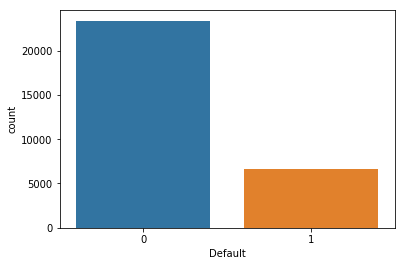

In [6]:
sns.countplot(x='Default', data=df)

In [7]:
#from sklearn.model_selection import train_test_split

In [8]:
df.shape

(30000, 7)

In [9]:
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,Default
0,1,20000,2,2,1,24,1
1,2,120000,2,2,2,26,1
2,3,90000,2,2,2,34,0
3,4,50000,2,2,1,37,0
4,5,50000,1,2,1,57,0


In [33]:
# pd.qcut(df['AGE'], 3)

In [10]:
#df.filter(regex='^BILL').head()

In [11]:
df = df.drop(['ID'], 'columns')

In [12]:
import statsmodels.formula.api as smf
import statsmodels.api as sm

#df2 = df.rename({'default payment next month': 'y'}, axis='columns')

In [13]:
#df2.head()

In [14]:
from sklearn.utils import shuffle
df = shuffle(df)
df.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,Default
27677,30000,2,1,2,24,0
6904,180000,2,4,1,30,0
6488,500000,2,1,2,39,0
15649,210000,2,2,1,36,0
16628,170000,1,2,1,34,0


In [38]:
l = [1, 2, 3, 4]
l[:2]

[1, 2]

In [39]:
l[2:]

[3, 4]

In [15]:
train = df.iloc[:15000]

In [16]:
test = df.iloc[15000:]

In [40]:
"Default ~ " + ' + '.join(train.columns[:-1])

'Default ~ LIMIT_BAL + SEX + EDUCATION + MARRIAGE + AGE'

In [17]:
model = smf.logit("Default ~ " + ' + '.join(train.columns[:-1]), data=train)
results = model.fit()

Optimization terminated successfully.
         Current function value: 0.511139
         Iterations 6


In [18]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                Default   No. Observations:                15000
Model:                          Logit   Df Residuals:                    14994
Method:                           MLE   Df Model:                            5
Date:                Fri, 19 Oct 2018   Pseudo R-squ.:                 0.02821
Time:                        15:25:06   Log-Likelihood:                -7667.1
converged:                       True   LL-Null:                       -7889.7
                                        LLR p-value:                 5.419e-94
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.3300      0.158     -2.088      0.037      -0.640      -0.020
LIMIT_BAL  -3.514e-06   1.87e-07    -18.797      0.000   -3.88e-06   -3.15e-06
SEX           -0.1810      0.041     -4.424      0.000      -0.261      -0.101
EDUCATION     -0.0644      0.027     -2.373      0.018      -0.118      -0.011
MARRIAGE      -0.1570      0.043     -3.669      0.000      -0.241      -0.073
AGE            0.0070      0.002      2.941      0.003       0.002       0.012
==============================================================================
"""

In [41]:
#np.exp(results.params)
results.predict(train.drop('Default', axis='columns'))

27677    0.267419
6904     0.178143
6488     0.072158
15649    0.187933
16628    0.239409
20611    0.132289
29084    0.182373
10989    0.237180
9273     0.074850
16827    0.277247
14419    0.098986
17661    0.160640
26989    0.144124
19659    0.284479
29070    0.184515
16844    0.210247
17279    0.301943
25861    0.221027
19444    0.241659
19098    0.267884
3036     0.153776
11394    0.301099
14348    0.213474
15605    0.297550
24528    0.218344
375      0.363490
1378     0.263334
28420    0.095315
4961     0.296934
6105     0.304865
           ...   
9588     0.250484
22508    0.109483
26251    0.170519
23113    0.198909
392      0.171116
17952    0.338224
6093     0.311831
14626    0.324571
2017     0.230540
2744     0.210965
24602    0.182219
20706    0.194360
19535    0.140764
13210    0.240588
4277     0.106007
6984     0.312758
28644    0.235419
26999    0.134564
27022    0.150294
5031     0.259072
22808    0.231689
26114    0.182817
1370     0.147617
29332    0.115386
6493     0

In [19]:
res = results.predict(train.drop('Default', axis='columns')) > .5

In [20]:
from sklearn.metrics import confusion_matrix

tn, fp, fn, tp = confusion_matrix(train['Default'], res).ravel()

In [21]:
# TP + TN / TP + FP + TN + FN
(tp + tn) / (tp + fp + tn + fn)

0.7807333333333333

In [42]:
res = results.predict(test.drop('Default', axis='columns'))
prd = res > .5
tn, fp, fn, tp = confusion_matrix(test['Default'], prd).ravel()
(tp + tn) / (tp + fp + tn + fn)

0.7768666666666667

In [ ]:
# x distribution of probability of default

C:\Users\Danie\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


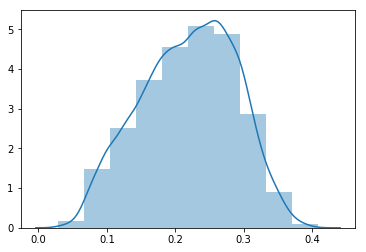

In [27]:
sns.distplot(res, bins=10)

In [28]:
res

27677    0.267419
6904     0.178143
6488     0.072158
15649    0.187933
16628    0.239409
20611    0.132289
29084    0.182373
10989    0.237180
9273     0.074850
16827    0.277247
14419    0.098986
17661    0.160640
26989    0.144124
19659    0.284479
29070    0.184515
16844    0.210247
17279    0.301943
25861    0.221027
19444    0.241659
19098    0.267884
3036     0.153776
11394    0.301099
14348    0.213474
15605    0.297550
24528    0.218344
375      0.363490
1378     0.263334
28420    0.095315
4961     0.296934
6105     0.304865
           ...   
9588     0.250484
22508    0.109483
26251    0.170519
23113    0.198909
392      0.171116
17952    0.338224
6093     0.311831
14626    0.324571
2017     0.230540
2744     0.210965
24602    0.182219
20706    0.194360
19535    0.140764
13210    0.240588
4277     0.106007
6984     0.312758
28644    0.235419
26999    0.134564
27022    0.150294
5031     0.259072
22808    0.231689
26114    0.182817
1370     0.147617
29332    0.115386
6493     0

In [25]:
res = results.predict(test.drop('Default', axis='columns'))
prd = res > .5
tn, fp, fn, tp = confusion_matrix(test['Default'], prd).ravel()
(tp + tn) / (tp + fp + tn + fn)

0.7768666666666667

In [78]:
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

In [98]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42, stratify=y)

In [43]:
from sklearn.linear_model import LogisticRegression

In [44]:
clf = LogisticRegression(random_state=0, solver='lbfgs').fit(X_train, y_train)

In [45]:
import numpy as np

In [46]:
np.exp(clf.coef_)

array([[0.99999457, 0.99999055, 0.99998836, 0.99999015, 0.99983341,
        1.00001288, 1.00001022, 1.00000887, 1.0000085 , 1.00000775,
        1.00000738, 0.99999173, 1.00000078, 1.00000356, 1.00000157,
        1.00000469, 1.00000163, 0.99997155, 0.99995982, 0.99999096,
        0.9999902 , 0.9999981 , 0.99999846]])

In [47]:
clf.coef_

array([[-5.43408077e-06, -9.44942821e-06, -1.16415029e-05,
        -9.85133393e-06, -1.66600261e-04,  1.28781395e-05,
         1.02172911e-05,  8.86711798e-06,  8.49519076e-06,
         7.74626718e-06,  7.37894104e-06, -8.26516394e-06,
         7.79825002e-07,  3.56296673e-06,  1.56596976e-06,
         4.68511105e-06,  1.62833183e-06, -2.84553281e-05,
        -4.01824002e-05, -9.03831592e-06, -9.80099346e-06,
        -1.89932950e-06, -1.53579017e-06]])

In [48]:
from sklearn.linear_model import LogisticRegressionCV

In [49]:
clf = LogisticRegressionCV(cv=5, random_state=0).fit(X_train, y_train)

In [50]:
clf.intercept_

array([-0.00050787])

In [51]:
clf.coef_

array([[-3.42368523e-06, -9.24661494e-04, -1.08165549e-03,
        -9.83880698e-04, -1.39738527e-02,  1.67608541e-03,
         1.33200908e-03,  1.15392619e-03,  1.08743077e-03,
         9.80751461e-04,  9.26304773e-04, -7.51529674e-06,
         2.02416890e-06,  3.21134975e-06,  9.36878013e-07,
         7.05047127e-06, -1.23011879e-06, -1.88533080e-05,
        -3.43728681e-05, -1.08402647e-05, -1.16501797e-05,
        -5.27912066e-07, -3.56766260e-06]])

In [52]:
np.exp(clf.coef_)

array([[0.99999658, 0.99907577, 0.99891893, 0.9990166 , 0.98612333,
        1.00167749, 1.0013329 , 1.00115459, 1.00108802, 1.00098123,
        1.00092673, 0.99999248, 1.00000202, 1.00000321, 1.00000094,
        1.00000705, 0.99999877, 0.99998115, 0.99996563, 0.99998916,
        0.99998835, 0.99999947, 0.99999643]])

In [54]:
clf.predict(X_test)

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

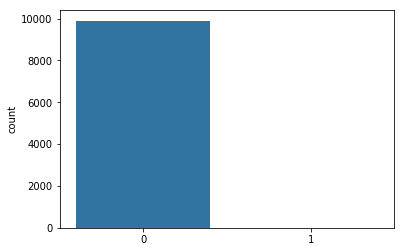

In [55]:
sns.countplot(clf.predict(X_test))

In [56]:
#qcut

In [57]:
X_test.shape

(9900, 23)

In [58]:
p = clf.predict_proba(X_test)

In [59]:
pd.DataFrame(p)[0]

0       0.645442
1       0.689200
2       0.701840
3       0.667579
4       0.655726
5       0.603820
6       0.774762
7       0.699546
8       0.669754
9       0.813033
10      0.766987
11      0.698502
12      0.723945
13      0.814897
14      0.775592
15      0.667175
16      0.847948
17      0.984181
18      0.718101
19      0.787977
20      0.692090
21      0.667767
22      0.986471
23      0.679193
24      0.673637
25      0.592641
26      0.752576
27      0.834718
28      0.737254
29      0.707716
          ...   
9870    0.758102
9871    0.643345
9872    0.682279
9873    0.961264
9874    0.871973
9875    0.870178
9876    0.904395
9877    0.883237
9878    0.717661
9879    0.752163
9880    0.637991
9881    0.832655
9882    0.658691
9883    0.895601
9884    0.997531
9885    0.714534
9886    0.659817
9887    0.752526
9888    0.639381
9889    0.795749
9890    0.687073
9891    0.768943
9892    0.692410
9893    0.790701
9894    0.623619
9895    0.800822
9896    0.763321
9897    0.7609

In [60]:
cuts = pd.qcut(pd.DataFrame(p)[0],4)

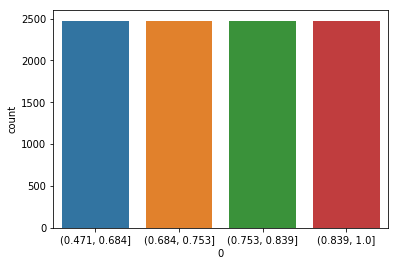

In [61]:
sns.countplot(cuts)

C:\Users\Danie\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


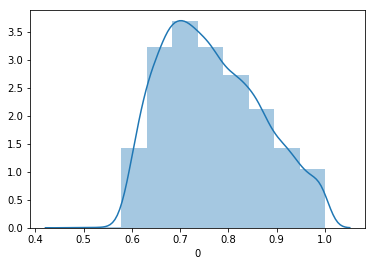

In [119]:
sns.distplot(pd.DataFrame(p)[0], bins=10)

In [63]:
from sklearn.metrics import accuracy_score

In [64]:
predictions = clf.predict(X_test)
predictions

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [65]:
accuracy_score(y_test, predictions)

0.7788888888888889